<a href="https://colab.research.google.com/github/debanjan02/cifar100/blob/master/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import mnist, cifar100
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

169009152/169001437 [==============================] - 157s 1us/step


In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, Convolution2D, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D,Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                                   
model.add(Dense(100, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [6]:
hist = model.fit(x_train,y_train,batch_size=128,epochs=300,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/300
40000/40000 [==============================] - 6s 158us/step - loss: 12.4525 - acc: 0.0127 - val_loss: 4.5965 - val_acc: 0.0275
Epoch 2/300
40000/40000 [==============================] - 6s 151us/step - loss: 4.3237 - acc: 0.0566 - val_loss: 4.3708 - val_acc: 0.0672
Epoch 3/300
40000/40000 [==============================] - 6s 151us/step - loss: 3.9868 - acc: 0.1051 - val_loss: 3.9969 - val_acc: 0.0986
Epoch 4/300
40000/40000 [==============================] - 6s 151us/step - loss: 3.7388 - acc: 0.1417 - val_loss: 3.6991 - val_acc: 0.1471
Epoch 5/300
40000/40000 [==============================] - 6s 151us/step - loss: 3.5402 - acc: 0.1725 - val_loss: 3.5754 - val_acc: 0.1699
Epoch 6/300
40000/40000 [==============================] - 6s 151us/step - loss: 3.3719 - acc: 0.2055 - val_loss: 3.4607 - val_acc: 0.1956
Epoch 7/300
40000/40000 [==============================] - 6s 152us/step - loss: 3.2252 - acc: 0.2305 - val_loss: 3

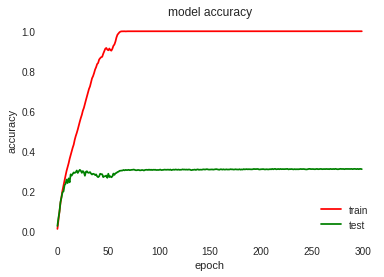

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

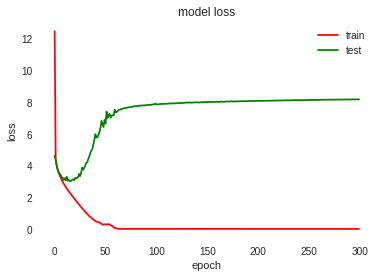

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
from keras.applications.xception import Xception

from keras.layers import Input
input_tensor = Input(shape=(32, 32, 3))


# create the base pre-trained model
base_model = Xception(input_tensor=input_tensor, include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)

predictions = Dense(100, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

83689472/83683744 [==============================] - 4s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
____________________________________________

In [12]:
hist = model.fit(x_train,y_train,batch_size=128,epochs=100,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 67s 2ms/step - loss: 4.2080 - acc: 0.0462 - val_loss: 3.7763 - val_acc: 0.0855
Epoch 2/100
40000/40000 [==============================] - 58s 1ms/step - loss: 3.1298 - acc: 0.1874 - val_loss: 3.0073 - val_acc: 0.2188
Epoch 3/100
40000/40000 [==============================] - 58s 1ms/step - loss: 2.4990 - acc: 0.3199 - val_loss: 2.7205 - val_acc: 0.2921
Epoch 4/100
40000/40000 [==============================] - 58s 1ms/step - loss: 2.0978 - acc: 0.4132 - val_loss: 2.3586 - val_acc: 0.3805
Epoch 5/100
40000/40000 [==============================] - 58s 1ms/step - loss: 1.7737 - acc: 0.4970 - val_loss: 2.4320 - val_acc: 0.3985
Epoch 6/100
40000/40000 [==============================] - 58s 1ms/step - loss: 1.5164 - acc: 0.5636 - val_loss: 2.4318 - val_acc: 0.4180
Epoch 7/100
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3076 - acc: 0.6174 - val_loss: 2.4545 - 

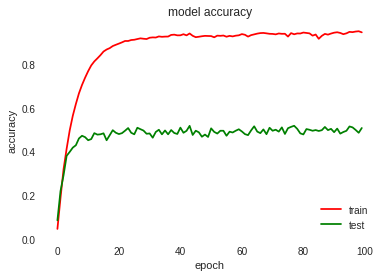

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

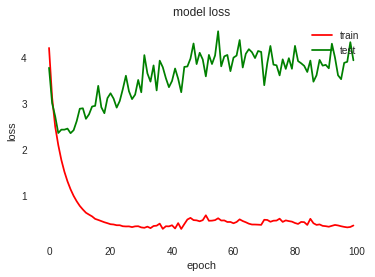

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [15]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       100
           1       0.71      0.61      0.66       100
           2       0.32      0.42      0.36       100
           3       0.44      0.33      0.38       100
           4       0.30      0.40      0.34       100
           5       0.53      0.46      0.49       100
           6       0.69      0.52      0.59       100
           7       0.70      0.54      0.61       100
           8       0.71      0.62      0.66       100
           9       0.70      0.64      0.67       100
          10       0.27      0.39      0.32       100
          11       0.36      0.29      0.32       100
          12       0.59      0.65      0.62       100
          13       0.45      0.45      0.45       100
          14       0.62      0.33      0.43       100
          15       0.48      0.53      0.50       100
          16       0.63      0.48      0.55       100
          17       0.60    

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(100, 60))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

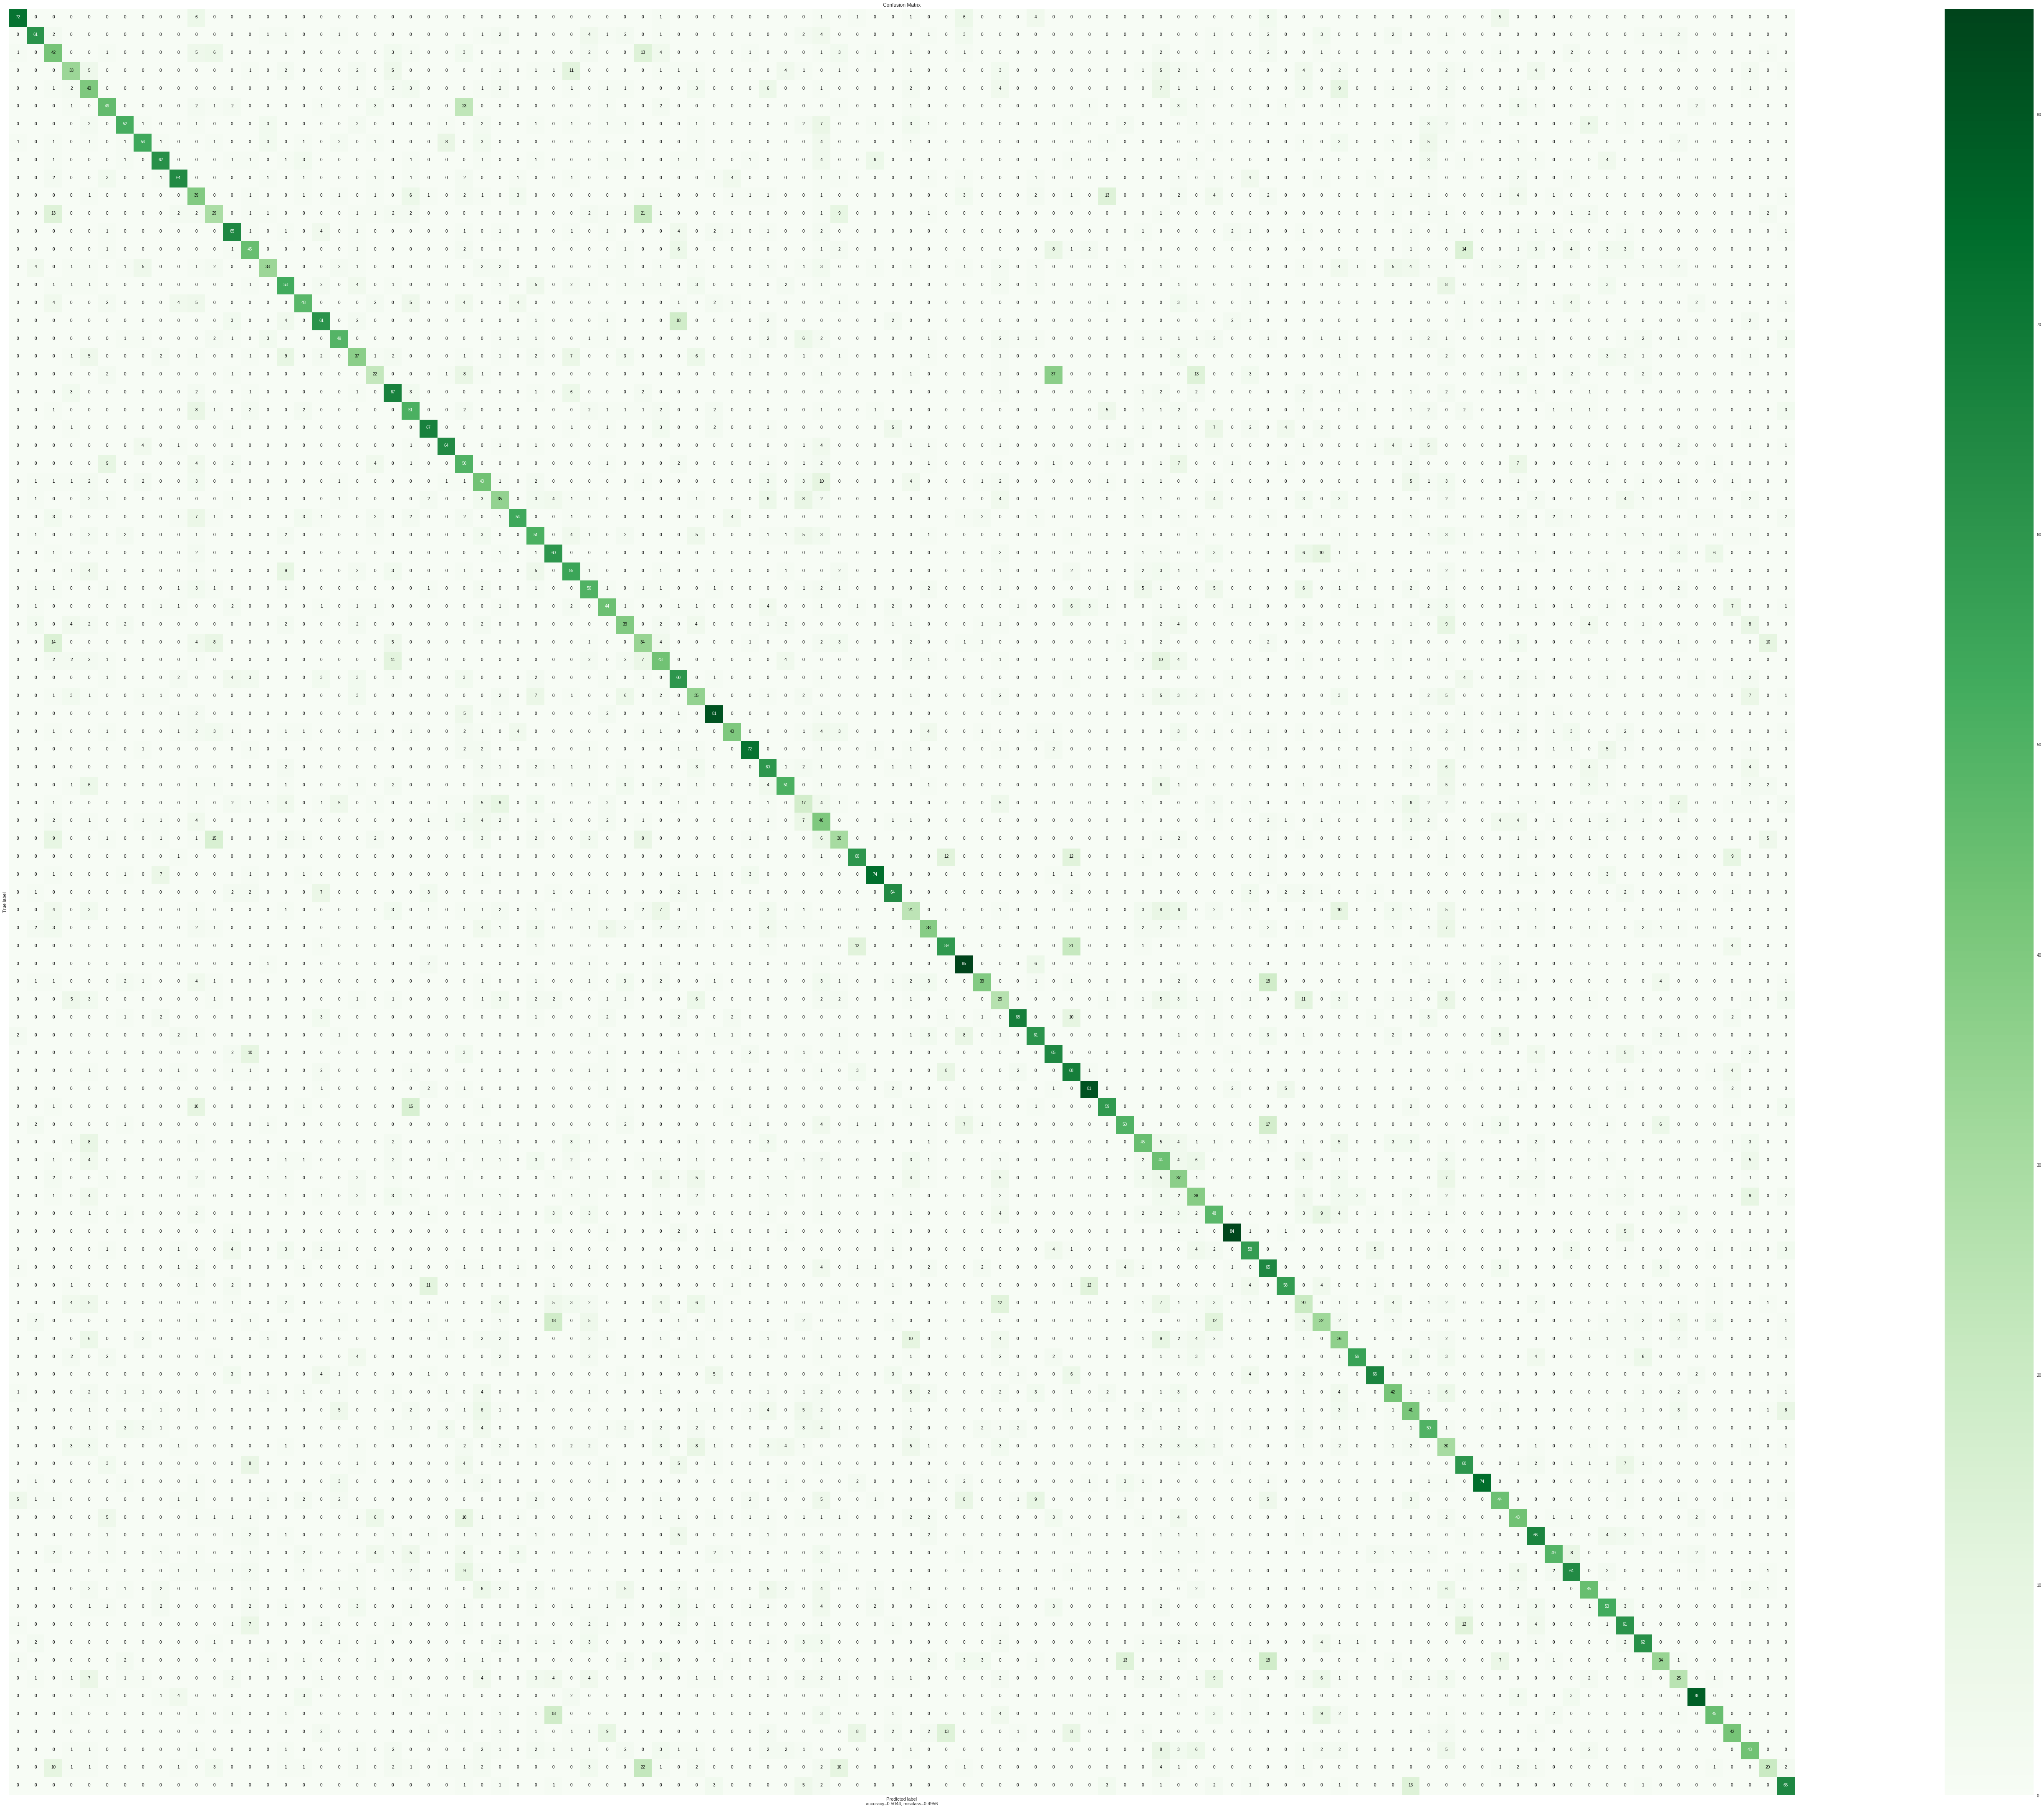

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      cmap = 'Greens',
                      normalize    = False,
                      target_names = [],
                      title        = "Confusion Matrix")

In [22]:
from keras.applications.vgg16 import VGG16

from keras.layers import Input
input_tensor = Input(shape=(32, 32, 3))


# create the base pre-trained model
base_model = VGG16(input_tensor=input_tensor, include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

x = Dense(256, activation='relu')(x)

x = Dense(128, activation='relu')(x)

predictions = Dense(100, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool

In [23]:
hist = model.fit(x_train,y_train,batch_size=128,epochs=100,validation_split=0.2)













































































































































































































































































































































































































































































































































































































































































































































































































































































Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 50s 1ms/step - loss: 15.9567 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 2/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 3/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 4/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 5/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 6/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_loss: 15.9360 - val_acc: 0.0113
Epoch 7/100
40000/40000 [==============================] - 45s 1ms/step - loss: 15.9622 - acc: 0.0097 - val_lo